<h1><center>Homework 2 </center></h1>                    
Mele Umberto Junior

The Goal of this Homework is to show how it is possible to achieve some good informations and set up a machine learning framework that predicts the prevalence of a specific chronic disease or health risk factor (in our case **diabete**) from digital records (*Google trends*) of online behavior.

#####  GROUND TRUTH DATA

>For the ***Ground truth data*** is been selected the data from the Behavioral Risk Factor Surveillance System (BRFSS, https://www.cdc.gov/brfss/) database of the US Center for Disease Control and Prevention.

>We have downloaded this using the Urls of the data download and the PACKAGE: *"REQUEST"* the folder where it's possible to see this script is in **BIN** and the filename is **"download_data.py"** .

>Data is spatially aggregated at different levels (US, state, country, etc.) and temporally aggregated at the yearly scale, so we have the behaviour in time of each state more $95\%$ Confidence Interval.

   1) **age_adj** : contains the value in percentage of the 'Yes' response at the question 'Have you ever been told by a doctor that you have diabetes?', for every state in the US, for every year that has been selected. Data are downloaded from BRFSS site, and Age Adjusted Prevalence was selected. This dataset is builted standardizing the *crude* one to the age distribution of a specific population, usually the U.S. 2000 standard population.

  2) **crude** : contains the value in percentage of the 'Yes' response at the question 'Have you ever been told by a doctor that you have diabetes?', for every state in the US, for every year that has been selected. Data are downloaded from BRFSS site, and Crude Prevalence was selected.



#####  DIGITAL PROXY DATA

###### Google Trends
>For the ***Digital Proxy Data*** we used Google Trends data available at https://trends.google.com, and selected some words that we think has good corelation with our disease like 'insuline', 'gluten free', 'hyperglycemia', ect.

>This data are taken from 2004 to 2018 and they tell us the conduct of this search queries in each of the official U.S. states.

>Since Google uses *differential privacy* to hide the sensitive information on this data, we had to download the behavior both in time and in space the python code to download this data using 'PYTRENDS' is in **"BIN\download_data.py"** .

######  US Census Bureau 
>**US_census** : contains data from US Census Bureau about US poverty for the 51 US states, for three different time intervals:
- 2014 - 2016
- 2013 - 2014
- 2015 - 2016

Data are downloaded from US Census Bureau site,  https://www.census.gov/data/tables/2017/demo/income-poverty/p60-259.html .


Then we used this same source data to download the **Health Insurance Historical** Tables - HIC Series, from https://www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hic.html.

The scripts to download this data is in **"BIN\download_data.py"**.

In [ ]:
# Let's import all libraries and useful data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import BIN.my_lib as my
import BIN.plot_data as my_plot
import plotly.offline as py
py.init_notebook_mode(connected=True)

############## Ground Truth Data
adj = pd.read_csv('BIN/data/age_adjusted_clean.csv',index_col=0)
crd = pd.read_csv('BIN/data/crude_clean.csv',index_col=0)
crude = my.clear_crude(crd)
age_adj = my.clear_age_adjusted(adj)

#States
with open('BIN/data/states.txt', 'r', encoding = 'UTF') as r:
    st = r.read()
states = eval(st)


############### Google Trends Data

# Spatial
keywords = ['diabetes', 'hypertension', 'type 2 diabetes',
            'type 1 diabetes', 'hyperglycemia', 'cholesterol',
            'obese', 'insulin', 'triglycerides', 'pee', 'gluten']
google_data = []
for k in keywords:
    google_data.append(pd.read_csv('BIN/data/'+k+'_region.csv', index_col=0))


# Temporal
with open('BIN/data/key_words.txt', 'r', encoding = 'UTF') as r:
    all_keys = eval(r.read())

dic = {}
for word in all_keys:
    dic[word]= pd.read_csv('BIN/data/'+word+'_time.csv', index_col=0)
    dic[word].index = np.arange((2018-len(dic[word].index)+1),2018+1)
    
    
####################### US-Census Data

US_census = my.download_US_Census_Bureau(google_data[0])



C:\Users\Umbertojunior\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## PART 1: CORRELATION STUDY

#### 1.1
###### Study the correlation between the ground truth data and the Google Trends data. Explore multiple features of the ground truth data (e.g., crude prevalence, age-adjusted prevalence, etc.), and multiple keywords or entity types for querying the Google Trends data. Check for stability (or lack there of) across different years.

We want to compute the correlation beetween each keyword selected on google trends and the ground truth, so we decide to do two type of things:

  1) Spatial Correlation that says us if the choosen keyword has a good behaiour on space, that means that when we have high values for Trends we have high values also for the ground truth with good probability, in the same state.
 
 2) Time variation correlation, that says if trends increase what is the behaviour of ground truth.
    

##### Spatial Correlation

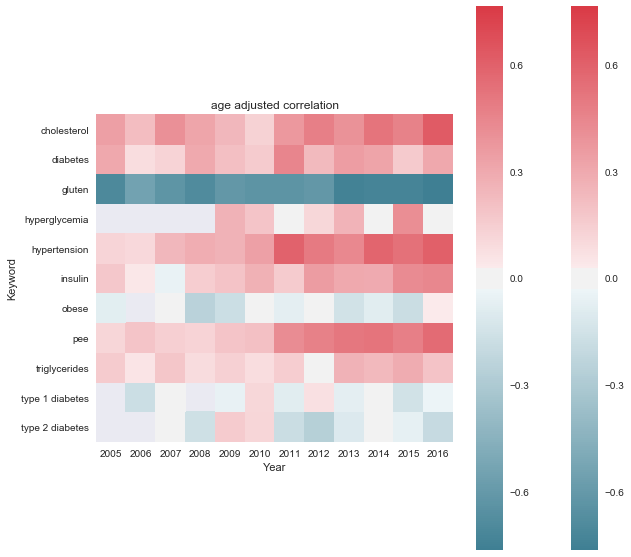

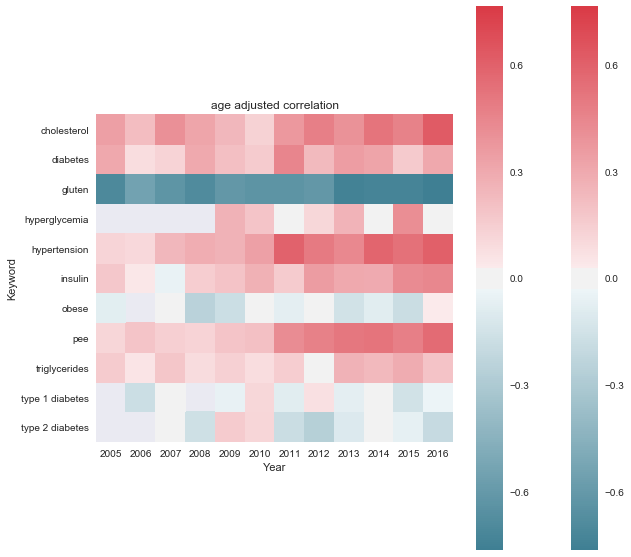

In [2]:
# Spatial Correlation
google = my.build_google_trend_dataframe(google_data, keywords, 2005, 2016)
crude_corr = my.get_google_trend_correlation_in_space(google, crude, keywords)
age_adj_corr = my.get_google_trend_correlation_in_space(google, crude, keywords)

# Plots
my_plot.plot_correlations(crude_corr, age_adj_corr)

How we can see cleary from this correlation plot that the word *gluten* has a strong negative correlation in space (this means that if a states has high value of diabete's prevalence with respect to the others states then we should observe also a high value on google trend of that query in that state with respect to the others )and this property is maintened during all the years. (we can justify this by thinking that people that looks for gluten usually are careful to eat to much gluten so the number of diabete's cases decrease!!! And this is a great result!)

Another interesting thing, but a bit less than the previous is that **cholesterol, hypertension, insulin** and **pee** has positive correlation in space.

More we can see that correlation is increasing in the last years and this could mean that the sensibility of google trend data is increasing on time since people trust more the network when they have some problems!

.


.



##### Variation on time correlation

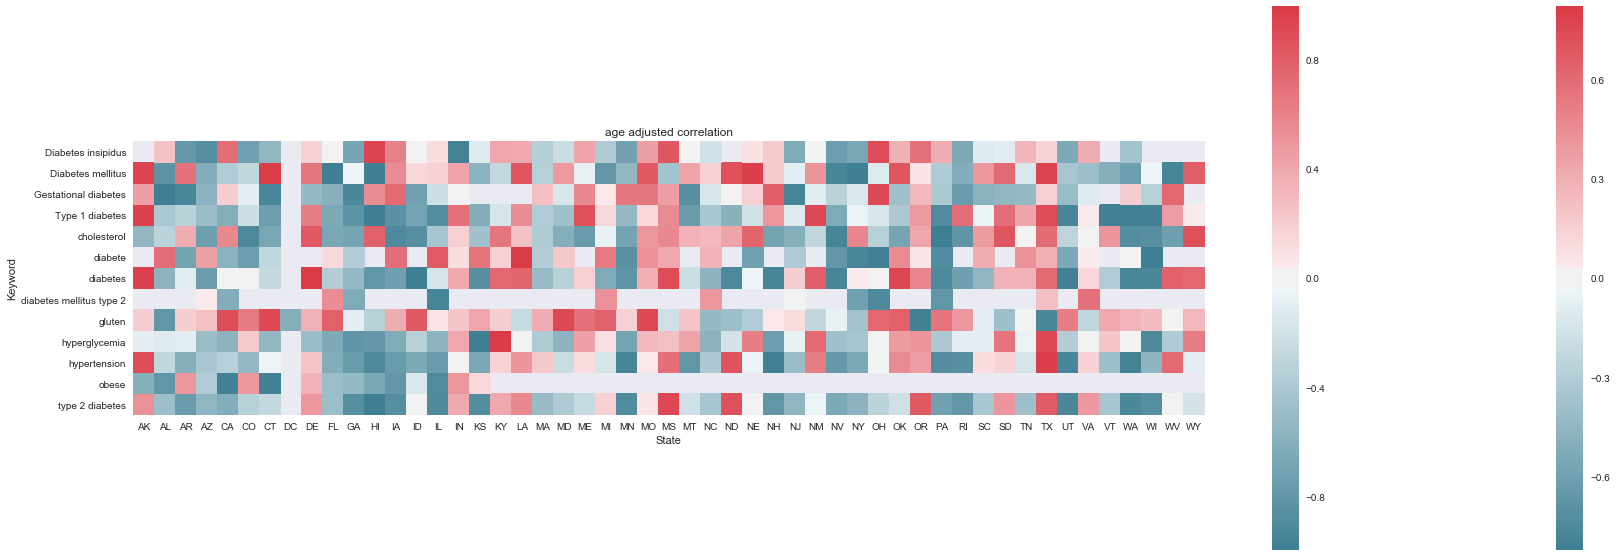

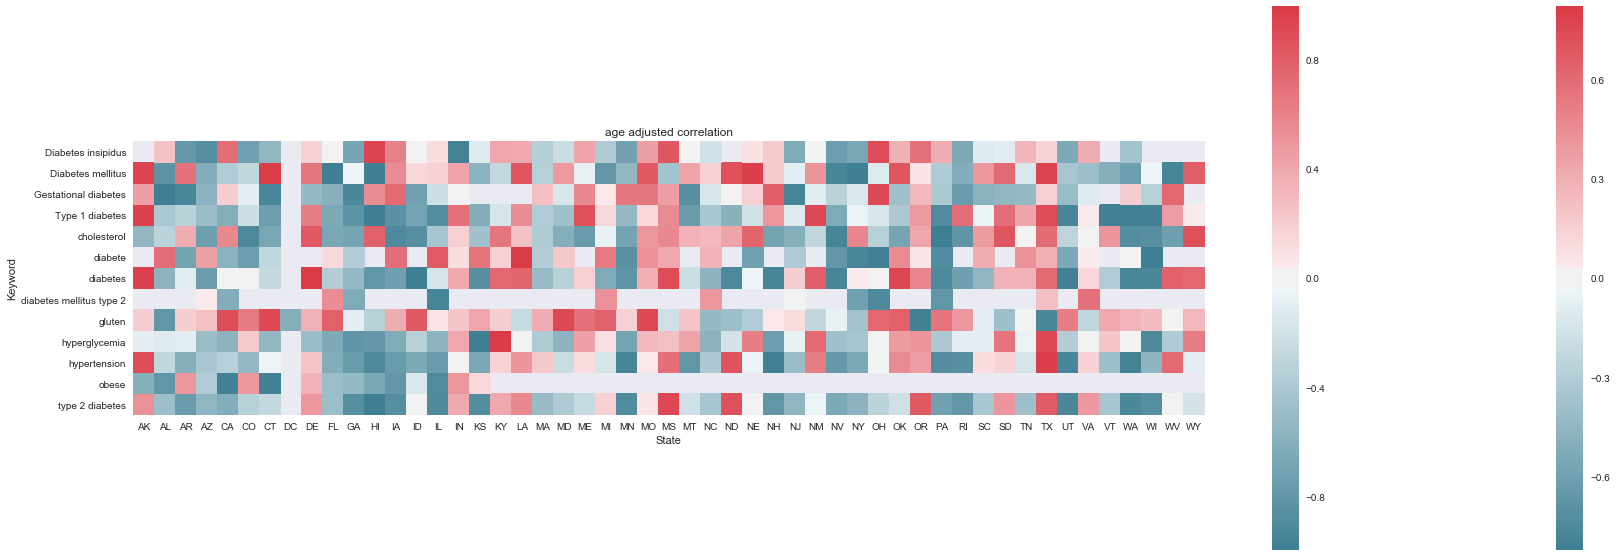

In [3]:
crude_corr = my.get_google_trend_correlation_in_time(crude,dic,all_keys)
adj_corr = my.get_google_trend_correlation_in_time(age_adj,dic,all_keys)

# Plot correlation in Time
my_plot.plot_correlations(crude_corr.transpose(), adj_corr.transpose())

From these plots we can infer that some keywords has high correlation in some states but no one in all... so there's no clear pattern in all the states since evrywhere the correlation is quite different.

But from this plot we can infer also something that is very interesting! The correlation with the word **obese** and **diabetes mellitus type 2** is very low... and this could mean that obesity and diabete are uncorellated, while people that has been diagnostic diabete mellitus type 2 doesn't search more the term, since they know from long time how to manage this desease.

.


.


### 1.2  Study the correlation of your target ground truth feature with income/poverty features.

Given that we have the mean for 3 intervals of time about the poverty index, we have to build the mean of the age_adj and crude for that 3 intervals of time(2014-2016, 2013-2014, 2015, 2016) in order to have a fair correlation coefficient.

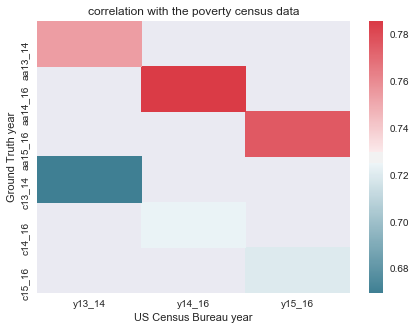

In [4]:
ground_truth = my.ground_truth_data_preparation(age_adj, crude)
census_corr = my.census_correlation(ground_truth, US_census)

plt.figure(figsize=(7,5))
sns.heatmap(census_corr.transpose(), mask=np.zeros_like(census_corr.transpose(), dtype=np.bool),
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=False).set_title('correlation with the poverty census data')

## EXTRA 

We considered that an other interestin thing to check is if there's some kind of structure in the behavior of the differents states.
So we setup a study on the corelation of the variations in time in each state, and after we use the *Graphical Lasso* model to estimates the covariance of the variation...

Then using simple Algebraic Topology we build the partition of the graph.

In [535]:
import importlib as i
i.reload(my)
i.reload(my_plot)

<module 'BIN.plot_data' from 'C:\\Users\\Umbertojunior\\Desktop\\data science\\third Semestr\\digital epidemiology\\hw2\\final presentation\\BIN\\plot_data.py'>

In [536]:
# state correlation structure using simple correlatio
links , G, labels_l = my.correlation_between_states(crude, states,threshold=0.5)
my_plot.create_a_3D_plot(G,"the States diabete correlation in United States",labels_l)

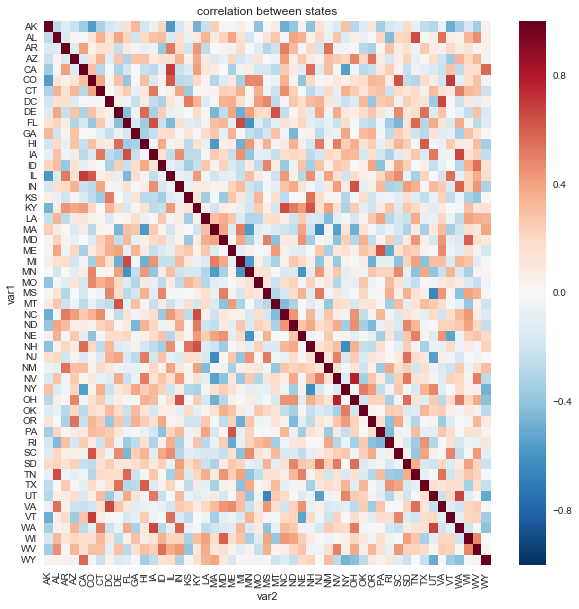

In [537]:
plt.figure(figsize=(10,10))
sns.heatmap(links).set_title('correlation between states')

In [7]:
# state correlation structure using graphical lasso model
links , G, labels_l = my.correlation_between_states_2(crude, states,threshold=0)
my_plot.create_a_3D_plot(G,"correlation using Graphical Lasso",labels_l)

this structures are intereseting since if we want to do cross-validation in space is better to preserve the structure of the problem instead of mixing different things togheter.

# Part 2.  PREDICTION MODEL

##### 2.1 - Set up a regression model that predicts your chosen ground truth indicator(s) on the basis of  Google Trends data for several keywords. Discuss the strategy you use for selecting additional keywords and for selecting which ones you include in the model. Select the model via temporal and spatial cross-validation, and discuss its generalisability across states and years on the basis of your results.

1) The first idea is to put everything in a single dataset and train it with a simple lasso doying so temporal-spatial cross-validation... (this means that we take each observation like an i.i.d. sample)

2) Then We use a single regression for each state (the model chosen is Ordinary least squared + Gaussian Process Regresion) 

3) The we try to make predictions fitting the hyper-parameters with a CV that use the partion view previously (still in progress)

<h4><center> 1 . Simple Lasso with CV in time and Space </center></h4>                    

This method is of course a little bit like cheating since in theory we don't know the true value of the future... but let's see what happen!

In [495]:
X,y = my.prepare_data_simple_lasso(adj,google,dic, keywords, all_keys)

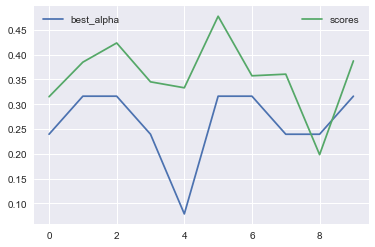

In [496]:
from sklearn.model_selection import RepeatedKFold

random_state = 1
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=random_state)
best_alpha = []
scores = []

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
    clf.fit(X_train, y_train)
    best_alpha.append(clf.best_params_['alpha'])
    scores.append(clf.score(X_test,y_test))
    

my_plot.best_alpha(best_alpha,scores)

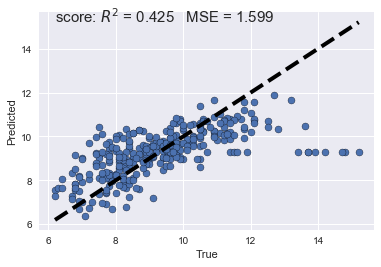

In [497]:
from sklearn.metrics import mean_squared_error

alpha = best_alpha[np.argmin(scores)]
#alpha = np.mean(best_alpha)
lasso = Lasso(alpha)
lasso.fit(X,y)
score = lasso.score(X,y)
score_2 = mean_squared_error(y, prediction)
prediction = lasso.predict(X)

my_plot.plot_regression(y,prediction,score, score_2)

We can see that this is **good but not amazing**... 
to increase this value is possible too choose better models or better data from Google trends, we could not download more data with the API since our limit was expired.

It's interesting to note that the outliers in the graph are outliers also in the regression model!!!


<h4><center> Recursive least squares + Gaussian Process regression </center></h4>                    

After we wanted to considerate each state separatly from each other and see what we can do.

In [771]:
st = 'NY'
X_s, y_s = my.prepare_data_for_state(crd,dic,all_keys, st=st)

score R^2 = -0.080
score MSE = 2.548


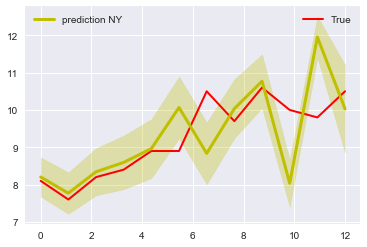

In [766]:
import statsmodels.api as sm

X_s = sm.add_constant(X_s)
from_ = 5
prd = [np.mean(y_s) for _ in range(from_)]
tscv = TimeSeriesSplit(n_splits= len(y_s)-from_)
for train_index, test_index in tscv.split(X_s):
    X_train, X_test = X_s[train_index], X_s[test_index]
    y_train, y_test = y_s[train_index], y_s[test_index]
    mod = sm.OLS(y_train,X_train)
    res = mod.fit()
    prd.append(res.predict(X_test))

prd = np.array(prd)
resid = y_s.flatten() -  prd

# Importing library for GPR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

X = np.arange(len(y_s))[:, np.newaxis]

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-1, noise_level_bounds=(1e-5, 1e-0))

gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, resid)

X_ = np.linspace(0,12,12)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

prd_final = prd + y_mean
print('score R^2 = %.3f'%r2_score(y_s, prd_final),
      'score MSE = %.3f'% mean_squared_error(y_s, ret['pred']), sep='\n')
 
my_plot.plot_regression_state(X_, prd_final ,y_cov, y_s, st)

score R^2 = 0.797
score MSE = 2.548


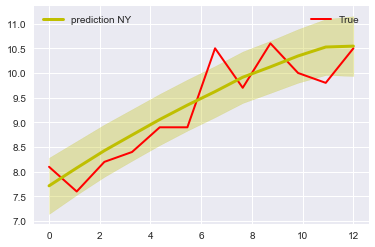

In [785]:
import statsmodels.api as sm

X_s = sm.add_constant(X_s)
from_ = 5
mod = sm.RecursiveLS(y_s,X_s)
res = mod.fit()
prd = [res.predicted_state[i,i] for i in range(y_s.shape[0])]

resid = y_s.flatten() -  prd

# Importing library for GPR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

X = np.arange(len(y_s))[:, np.newaxis]

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-1, noise_level_bounds=(1e-5, 1e-0))

gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, resid)

X_ = np.linspace(0,12,12)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

prd_final = prd + y_mean
print('score R^2 = %.3f'%r2_score(y_s, prd_final),
      'score MSE = %.3f'% mean_squared_error(y_s, ret['pred']), sep='\n')
 
my_plot.plot_regression_state(X_, prd_final ,y_cov, y_s, st)

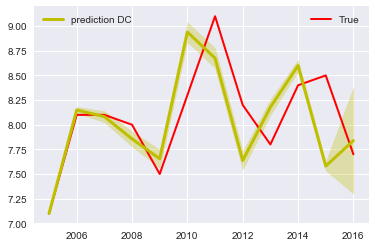

score mean R^2 = -2.751
score mean MSE = 4.296


In [789]:
from sklearn.metrics import mean_squared_error, r2_score
predictions_states = pd.DataFrame()
scores_states = []
for st in states:
    if st=='NH' or st=='WI' or st=='WV':
        continue
    X_s, y_s = my.prepare_data_for_state(crd,dic,all_keys, st=st)
    ret = my.regression_for_states(X_s, y_s)
    scores_states.append([r2_score(y_s, ret['pred']), mean_squared_error(y_s, ret['pred'])])
    dat = pd.DataFrame(ret['pred'], columns=[st],index=np.arange(2005,2017))
    predictions_states = pd.concat([predictions_states,dat], axis=1)
    
my_plot.plot_regression_state(np.arange(2005,2017), ret['pred'], ret['var'],y_s, st)
print('score mean R^2 = %.3f'%np.mean(np.array(scores_states)[:,0]),
      'score mean MSE = %.3f'%np.mean(np.array(scores_states)[:,1]), sep='\n')

In [790]:
import plotly.figure_factory as ff

stri = ['R^2','MSE']
for i in [0,1]:
    fig = ff.create_distplot([list(np.array(scores_states)[:,i])], ['distplot %s'%stri[i]])
    py.iplot(fig)

How we can note from this plot the prediction can be better or worst it depends on state...
but in generally it's worst than the previous cheating model!!! because previous model could use more data and also data from the future.
We create also a html visualization plot to show the prediction for all states...

In [813]:
import webbrowser
import os

webbrowser.open(os.path.abspath("BIN/data/map.html"))

True

### 2.2 - Add to your model census features at the US state level (e.g., income data) and discuss how adding them impacts the predictive performance of the model.

In [891]:
US_census = my.download_US_Census_Bureau(google_data[0])

In [892]:
X,y = my.prepare_data_simple_lasso(adj,google,dic, keywords, all_keys,
                                   census=US_census,states=states,from_= 2013,to_=2016)

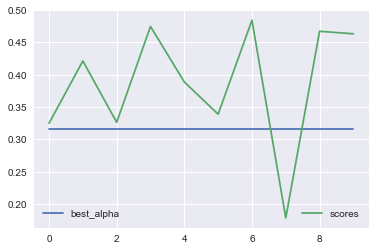

In [893]:
from sklearn.model_selection import RepeatedKFold

random_state = 1
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=random_state)
best_alpha = []
scores = []

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
    clf.fit(X_train, y_train)
    best_alpha.append(clf.best_params_['alpha'])
    scores.append(clf.score(X_test,y_test))
    

my_plot.best_alpha(best_alpha,scores)

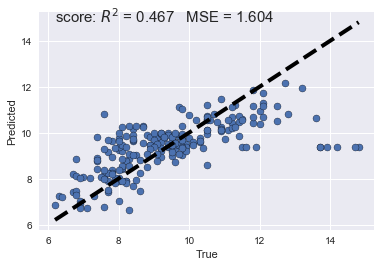

In [898]:
from sklearn.metrics import mean_squared_error

alpha = best_alpha[np.argmin(scores)]
#alpha = np.mean(best_alpha)
lasso = Lasso(alpha)
lasso.fit(X,y)
score = lasso.score(X,y)
prediction = lasso.predict(X)
score_2 = mean_squared_error(y, prediction)


my_plot.plot_regression(y,prediction,score, score_2)

So from this plot we can't assert that the income information of the US's states is usefull to have a better regression accuracy, the main problem in this setup is that this information is given for a few years... while google trends are more sustainable.

### 2.3 - Look for data on health insurance coverage across US states (any source you can find) and integrate it in your model. Repeat the above evaluation.


In [942]:
ins = my.clear_insurance(type_ins='Total',value='')
US_census = my.download_US_Census_Bureau(google_data[0])
X,y = my.prepare_data_simple_lasso(adj,google,dic, keywords, all_keys,
                                   census=US_census,states=states,from_= 2013,to_=2016,ins=ins)

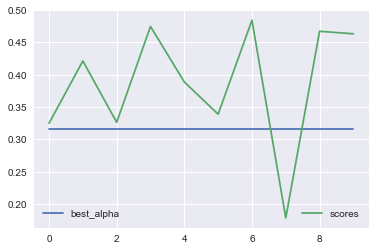

In [944]:
from sklearn.model_selection import RepeatedKFold

random_state = 1
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=random_state)
best_alpha = []
scores = []

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
    clf.fit(X_train, y_train)
    best_alpha.append(clf.best_params_['alpha'])
    scores.append(clf.score(X_test,y_test))
    

my_plot.best_alpha(best_alpha,scores)

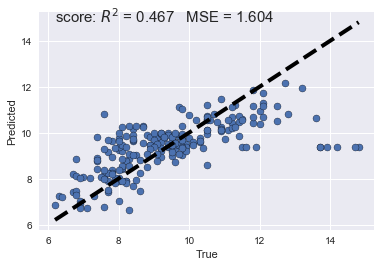

In [945]:
from sklearn.metrics import mean_squared_error

alpha = best_alpha[np.argmin(scores)]
#alpha = np.mean(best_alpha)
lasso = Lasso(alpha)
lasso.fit(X,y)
score = lasso.score(X,y)
prediction = lasso.predict(X)
score_2 = mean_squared_error(y, prediction)


my_plot.plot_regression(y,prediction,score, score_2)

From this last plot also is it impossible to say if the insurance coverage has some importance with respect to the regression... since the model looks unchanged like if lasso has shrinked the insurance information!!